In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True) 

In [7]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station 

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Climate Analysis

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest Date: ", str(latest_date[0]))
last_date_string = str(latest_date[0])
latest_date = dt.datetime.strptime(latest_date[0], "%Y-%m-%d")
query_date = dt.date(int(latest_date.strftime("%Y")), 
                     int(latest_date.strftime("%m")), 
                     int(latest_date.strftime("%d"))) - dt.timedelta(days=365)
print("Year Before :", str(query_date))
last_year_string = str(query_date)

Latest Date:  2017-08-23
Year Before : 2016-08-23


In [48]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year_string).all()

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(data, columns = ['Date', 'Precipitation'])
results_df.set_index('Date', inplace = True)

In [50]:
# Sort the dataframe by date
results_df = results_df.sort_values(by = ['Date'])

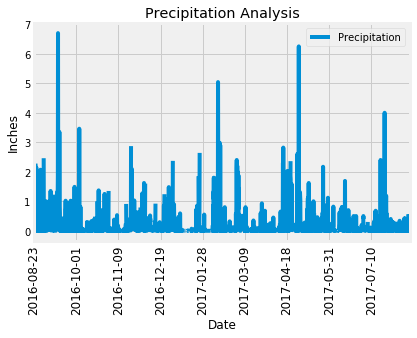

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot()
plt.title("Precipitation Analysis")
plt.xticks(fontsize=12, rotation=90)
plt.ylabel("Inches")
plt.show()


In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
# Design a query to show how many stations are available in this dataset?
availableStations = session.query(Station).count()
print(availableStations)

9


In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
for station in station_count:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = station_count[0][0]
print("Most Active Station: ", most_active)
temp_analysis = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()
print("Lowest Temp:", temp_analysis[0][0] )
print("Highest Temp:", temp_analysis[0][1] )
print("Average Temp:", temp_analysis[0][2] )

Most Active Station:  USC00519281
Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66378066378067


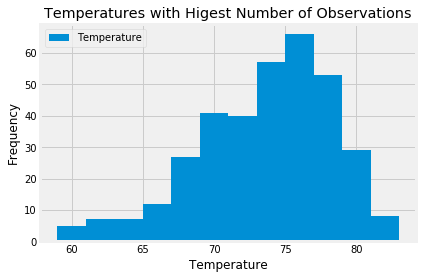

In [45]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#I used last_year_string because that was stored from the previous cell that holds the date 12 months ago
temperature_obs = (session.query( Measurement.tobs)
                  .filter(Measurement.date >= last_year_string)
                   .filter(Measurement.station == most_active)
                   .all())
tempobs_df = pd.DataFrame(temperature_obs, columns = ['Temperature'])
tempobs_df.plot(kind = 'hist', bins = 12)
plt.xlabel("Temperature")
plt.title("Temperatures with Higest Number of Observations")
plt.show()

## Bonus Challenge Assignment

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_analytics = calc_temps('2016-07-12', '2017-07-12')
print(trip_analytics)

[(58.0, 74.59210526315789, 87.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
